<a href="https://colab.research.google.com/github/abaskon/Thesis/blob/main/GPR_and_DBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

In [2]:
dbi1 = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/DBI1985-2004.csv")
dbi2 = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/DBI2004-today.csv")

dbi1['Price'] = dbi1['Price'].str.replace(',', '').astype(float)
dbi2['Price'] = dbi2['Price'].str.replace(',', '').astype(float)

In [3]:
GPR = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/data_gpr_daily_recent.csv")
GPRE = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/data_gpr_export.csv")

GPR['GPRD'] = GPR['GPRD'].str.replace(',', '').astype(float)

In [4]:
dbi1['Date'] = pd.to_datetime(dbi1['Date'], format='%m/%d/%Y')
dbi2['Date'] = pd.to_datetime(dbi2['Date'], format='%m/%d/%Y')

In [5]:
GPR = GPR.rename(columns={'DAY': 'Date'})

In [6]:
GPR['Date'] = GPR['Date'].astype(str)
# Convert the 'Date' column to datetime format
GPR['Date'] = pd.to_datetime(GPR['Date'], format='%Y%m%d')

# Convert the 'Date' column to the '%m/%d/%Y' format
GPR['Date'] = GPR['Date'].dt.strftime('%Y-%m-%d')
GPR['Date'] = pd.to_datetime(GPR['Date'])


In [7]:
dbi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4999 non-null   datetime64[ns]
 1   Price     4999 non-null   float64       
 2   Open      4999 non-null   object        
 3   High      4999 non-null   object        
 4   Low       4999 non-null   object        
 5   Vol.      0 non-null      float64       
 6   Change %  4999 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 273.5+ KB


In [8]:
GPR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13993 entries, 0 to 13992
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         13993 non-null  datetime64[ns]
 1   N10D         13993 non-null  int64         
 2   GPRD         13993 non-null  float64       
 3   GPRD_ACT     13993 non-null  object        
 4   GPRD_THREAT  13993 non-null  float64       
 5   date         13993 non-null  object        
 6   GPRD_MA30    13993 non-null  float64       
 7   GPRD_MA7     13993 non-null  float64       
 8   event        11 non-null     object        
 9   var_name     9 non-null      object        
 10  var_label    9 non-null      object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 1.2+ MB


In [12]:
# concatenate the two tables based on the 'date' column
DBI = pd.concat([dbi1, dbi2]).drop_duplicates(subset='Date')
DBI = DBI.sort_values(by='Date', ascending=False)

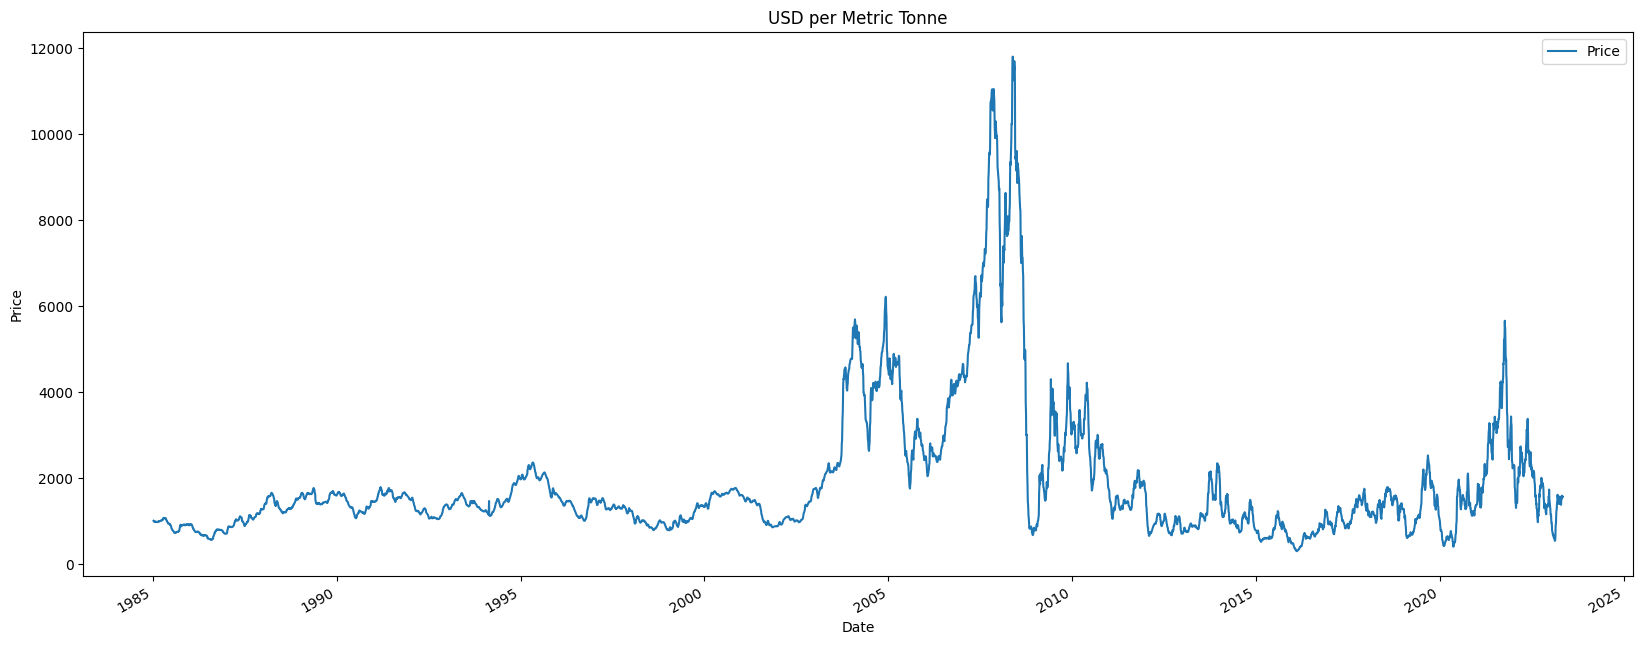

In [13]:
def plotgraph(df, x, y):
    df[y] = pd.to_numeric(df[y])
    df.plot(x=x, y=y, figsize=(20, 8))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('USD per Metric Tonne')
    plt.show()
plotgraph(DBI,'Date','Price')

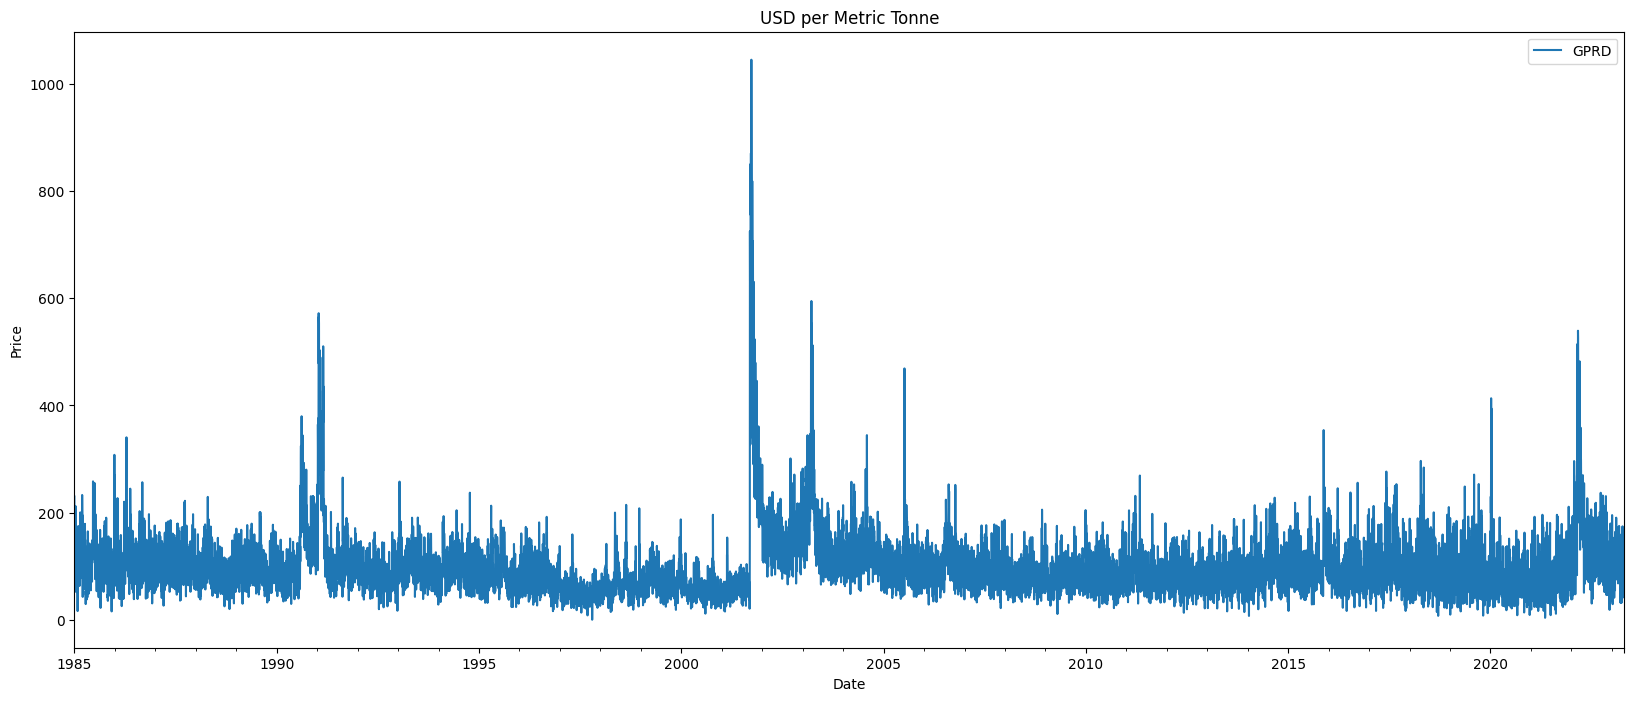

In [14]:
plotgraph(GPR,'Date','GPRD')

In [15]:
# Plotly line plot
fig = go.Figure(data=[go.Scatter(x=DBI['Date'], y=DBI['Price'])])
fig.show()


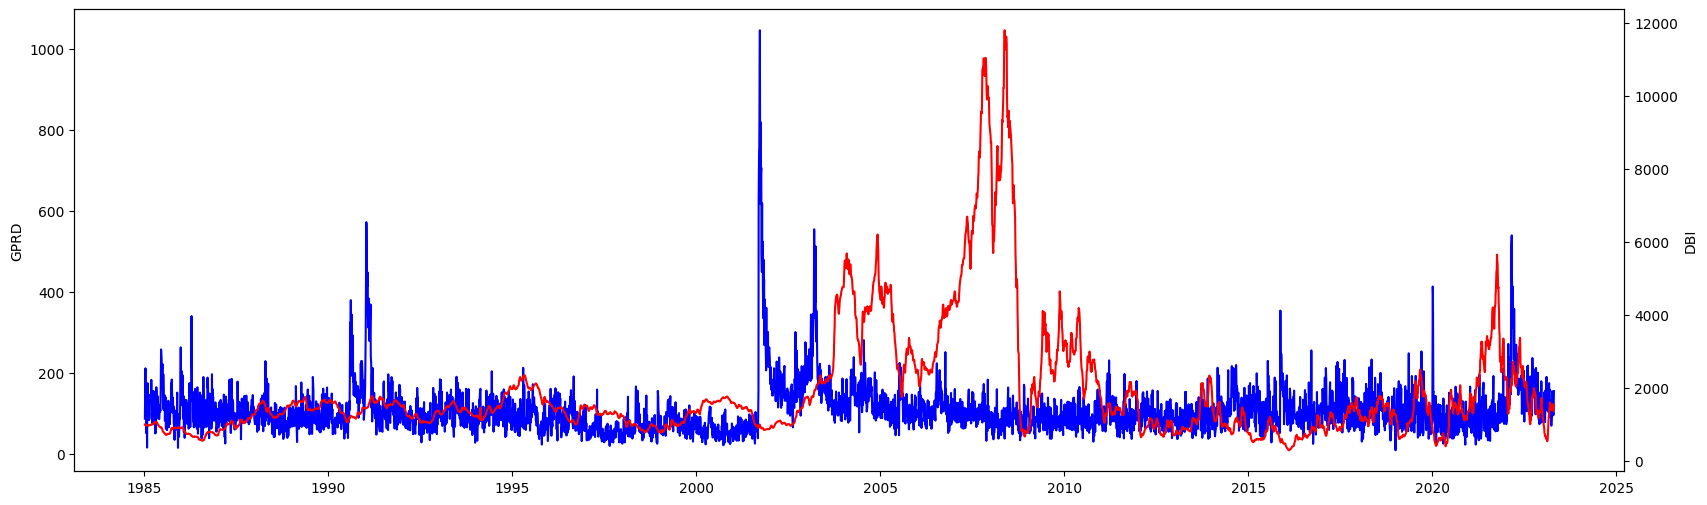

In [16]:

# Merge the two DataFrames based on the common x value
merged_df = pd.merge(DBI, GPR, on='Date')

# select every third row
merged_df = merged_df.iloc[::2, :]

import pandas as pd
import matplotlib.pyplot as plt


# create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(20, 6))

# plot the 'A' column on the first y-axis
ax1.plot(merged_df.Date, merged_df['GPRD'], color='blue')
ax1.set_ylabel('GPRD')

# create a second y-axis object
ax2 = ax1.twinx()

# plot the 'B' column on the second y-axis
ax2.plot(merged_df.Date, merged_df['Price'], color='red')
ax2.set_ylabel('DBI')

# normalize the two y-axis scales


# display the plot
plt.show()

In [17]:
#granger causality test